In [51]:
# Mini Project on Descriptive Analytics using file handling 

#1. **Descriptive Analysis**
#`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`
#`Identify the top 10 most-rated movies`
# First Solution - Descriptive Analysys

ratings = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [13]:
#2. **Genre Insights**
#`Which movie genres are the most frequently rated?`
#`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

movies_file_path = "movies.dat"  
ratings_file_path = "ratings.dat"  

with open(r'C:\\Users\\ASUS\\Downloads\\ml-1m\\ml-1m\\movies.dat', encoding='ISO-8859-1') as movies_file, \
     open(r'C:\\Users\\ASUS\\Downloads\\ml-1m\\ml-1m\\ratings.dat', encoding='ISO-8859-1') as ratings_file:
    
    movies_data = movies_file.readlines()
    movie_genres = {}  

    for line in movies_data: 
        movie_id, title, genres = line.strip().split("::")  
        movie_genres[movie_id] = genres.split('|')  

    ratings_data = ratings_file.readlines()
    genre_ratings = {}  

    for line in ratings_data:  
        user_id, movie_id, rating, timestamp = line.strip().split("::")  
        rating = float(rating)

        if movie_id in movie_genres:
            for genre in movie_genres[movie_id]:
                if genre not in genre_ratings:
                    genre_ratings[genre] = {'total_rating': 0, 'count': 0}
                genre_ratings[genre]['total_rating'] += rating
                genre_ratings[genre]['count'] += 1

most_frequent_genres = sorted(genre_ratings.items(), key=lambda x: x[1]['count'], reverse=True)
average_ratings = {genre: data['total_rating'] / data['count'] for genre, data in genre_ratings.items()}
sorted_average_ratings = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)

print("Most Frequently Rated Genres:")
for genre, data in most_frequent_genres:
    print(f"{genre}: {data['count']} ratings")

print("\nAverage Ratings by Genre:")
for genre, avg_rating in sorted_average_ratings:
    print(f"{genre}: {avg_rating:.2f}")
    
print(f"Maximum rating: {sorted_average_ratings[-1][0]} with {sorted_average_ratings[-1][1]:.2f}")
print(f"Minimum rating: {sorted_average_ratings[0][0]} with {sorted_average_ratings[0][1]:.2f}")

Most Frequently Rated Genres:
Comedy: 356580 ratings
Drama: 354529 ratings
Action: 257457 ratings
Thriller: 189680 ratings
Sci-Fi: 157294 ratings
Romance: 147523 ratings
Adventure: 133953 ratings
Crime: 79541 ratings
Horror: 76386 ratings
Children's: 72186 ratings
War: 68527 ratings
Animation: 43293 ratings
Musical: 41533 ratings
Mystery: 40178 ratings
Fantasy: 36301 ratings
Western: 20683 ratings
Film-Noir: 18261 ratings
Documentary: 7910 ratings

Average Ratings by Genre:
Film-Noir: 4.08
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Mystery: 3.67
Musical: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.22
Maximum rating: Horror with 3.22
Minimum rating: Film-Noir with 4.08


In [5]:
# 3. *User Engagement Analysis
# Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.

user_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\users.dat')
movies_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat')

user = dict()
for line in user_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'gender' : columns[1] , 'age' : int(columns[2]), 'occupation' : int(columns[3])}

movie = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie[int(columns[0])] = {'title' : columns[1], 'genre' : columns[2]}

rating = []
for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    rating.append({'user_id' : columns[0], 'movie_id' : columns[1], 'rating' : columns[2]})

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
age_group_ratings = {}
gender_ratings = {'M': [], 'F': []}
occupation_ratings = {}

for value in rating:
    user_id = value['user_id']
    movie_id = value['movie_id']
    rating = value['rating']

    userid = user[user_id]
    gender = user[user_id].get('gender')
    age_group = agegroup.get(user[user_id].get('age'))
    occupation = user[user_id].get('occupation')
    
    if age_group not in age_group_ratings:
        age_group_ratings[age_group] = []
    age_group_ratings[age_group].append(rating)

    gender_ratings[gender].append(rating)

    if occupation not in occupation_ratings:
        occupation_ratings[occupation] = []
    occupation_ratings[occupation].append(rating)


age_group_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in age_group_ratings.items()}
print("Average rating by Age group :\n")
for group, avg in age_group_avg.items():
    print(f"{group}: {avg:.2f}")

gender_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in gender_ratings.items()}
print("\nAverage rating by Gender:\n")
for group, avg in gender_avg.items():
    print(f"{group}: {avg:.2f}")


occupation_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in occupation_ratings.items()}
print("\nAverage rating by occupation:\n")
for group, avg in occupation_avg.items():
    print(f"{occupation_avg.get(group)}: {avg:.2f}")

Average rating by Age group :

Under 18: 3.55
56+: 3.77
25-34: 3.55
45-49: 3.64
50-55: 3.71
35-44: 3.62
18-24: 3.51

Average rating by Gender:

M: 3.57
F: 3.62

Average rating by occupation:

3.532674967797338: 3.53
3.596575476412942: 3.60
3.689773866062481: 3.69
3.5997723500118566: 3.60
3.497392254582181: 3.50
3.6565888056412517: 3.66
3.576642335766423: 3.58
3.654000769042542: 3.65
3.613573939793452: 3.61
3.5375443489988427: 3.54
3.6565158270878793: 3.66
3.618481337433057: 3.62
3.536792539227059: 3.54
3.6173710061761417: 3.62
3.466740576496674: 3.47
3.414049919484702: 3.41
3.573080610369897: 3.57
3.530117491312262: 3.53
3.537528604118993: 3.54
3.7817362221899082: 3.78
3.661577744926757: 3.66


In [7]:
# 4. *Rating Distribution by Demographics*

# Are there specific genres preferred by certain age groups or occupations?

user_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\users.dat')
movies_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat')

user = dict()
for line in user_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'age' : int(columns[2]), 'occupation' : int(columns[3])}

movie_genre = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

occupations_name = {0: "other or not specified",
               1: "academic/educator",
               2: "artist",
               3: "clerical/admin",
               4: "college/grad student",
               5: "customer service",
               6: "doctor/health care",
               7: "executive/managerial",
               8: "farmer",
               9: "homemaker",
               10: "K-12 student",
               11: "lawyer",
               12: "programmer",
               13: "retired",
               14: "sales/marketing",
               15: "scientist",
               16: "self-employed",
               17: "technician/engineer",
               18: "tradesman/craftsman",
               19: "unemployed",
               20: "writer"
              }
age_group_preferences = {}
occupation_preferences = {}

for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split("::")))
    user_id = columns[0]
    movie_id = columns[1]
    rating = columns[2]

    if (user_id in user) and (movie_id in movie_genre):
        user_data = user[user_id]
        genres = movie_genre[movie_id]

        age = user_data['age']
        if age not in age_group_preferences:
            age_group_preferences[age] = {}

        for genre in genres:
            if genre in age_group_preferences[age]:
                age_group_preferences[age][genre] +=1
            else:
                age_group_preferences[age][genre] =1

        occupation = user_data['occupation']
        if occupation not in occupation_preferences:
            occupation_preferences[occupation] = {}

        for genre in genres:
            if genre in occupation_preferences[occupation]:
                occupation_preferences[occupation][genre] +=1
            else:
                occupation_preferences[occupation][genre] =1


preference_by_age = sorted(age_group_preferences.items(), key = lambda x : x[0])
print("According to age preferences of genre")
for age in preference_by_age:
    print(agegroup.get(age[0]),":",end =' ')
    genre = max(age[1].items(), key = lambda x : x[1])
    print(genre[0])

preference_by_occupation = sorted(occupation_preferences.items(), key = lambda x : x[0])
print("\nAccording to occupation preferences of genre")
for occupation in preference_by_occupation:
    print(occupations_name.get(occupation[0]),":",end =' ')
    genre = max(occupation[1].items(), key = lambda x : x[1])
    print(genre[0])

According to age preferences of genre
Under 18 : Comedy
18-24 : Comedy
25-34 : Comedy
35-44 : Drama
45-49 : Drama
50-55 : Drama
56+ : Drama

According to occupation preferences of genre
other or not specified : Comedy
academic/educator : Drama
artist : Drama
clerical/admin : Comedy
college/grad student : Comedy
customer service : Comedy
doctor/health care : Drama
executive/managerial : Drama
farmer : Comedy
homemaker : Comedy
K-12 student : Comedy
lawyer : Drama
programmer : Comedy
retired : Drama
sales/marketing : Comedy
scientist : Drama
self-employed : Drama
technician/engineer : Comedy
tradesman/craftsman : Comedy
unemployed : Comedy
writer : Drama


In [1]:
#5. **Top Performers**
#`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`
#`Analyze the characteristics of top-rated movies (e.g., release year, genres).`

movie_file_path = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat'
rating_file_path = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat'

min_ratings = 10

movie_ratings = {}
movie_metadata = {}

with open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat', encoding='ISO-8859-1') as rating_file:
    for line in rating_file:
        line_data = line.strip().split('::')
        if len(line_data) != 4:  
            continue

        movie_id = line_data[1]
        try:
            rating = float(line_data[2])
        except ValueError:
            print(f"Invalid rating found in line: {line.strip()}")
            continue

        if movie_id in movie_ratings:
            movie_ratings[movie_id]['ratings'].append(rating)
        else:
            movie_ratings[movie_id] = {'ratings': [rating]}

with open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat', encoding='ISO-8859-1') as movie_file:
    for line in movie_file:
        line_data = line.strip().split('::')
        if len(line_data) != 3:  
            continue

        movie_id = line_data[0]
        title = line_data[1]
        genres = line_data[2]

        release_year = "Unknown"
        if '(' in title and ')' in title:
            release_year = title.split('(')[-1].split(')')[0]

        if movie_id not in movie_metadata:
            movie_metadata[movie_id] = {'genres': genres, 'release_year': release_year}

movie_avg_ratings = {}
for movie_id, data in movie_ratings.items():
    if len(data['ratings']) >= min_ratings:
        avg_rating = sum(data['ratings']) / len(data['ratings'])
        movie_avg_ratings[movie_id] = avg_rating

sorted_top_movies = sorted(movie_avg_ratings.items(), key=lambda x: x[1], reverse=True)

print("Top Rated Movies:")
for movie_id, avg_rating in sorted_top_movies:
    metadata = movie_metadata.get(movie_id, {'genres': 'Unknown', 'release_year': 'Unknown'})
    genres = metadata['genres']
    release_year = metadata['release_year']
    print(f"Movie ID: {movie_id}, Average Rating: {avg_rating:.2f}, Genres: {genres}, Release Year: {release_year}")


Top Rated Movies:
Movie ID: 2905, Average Rating: 4.61, Genres: Action|Adventure, Release Year: 1962
Movie ID: 2019, Average Rating: 4.56, Genres: Action|Drama, Release Year: 1954
Movie ID: 318, Average Rating: 4.55, Genres: Drama, Release Year: 1994
Movie ID: 858, Average Rating: 4.52, Genres: Action|Crime|Drama, Release Year: 1972
Movie ID: 745, Average Rating: 4.52, Genres: Animation|Comedy|Thriller, Release Year: 1995
Movie ID: 50, Average Rating: 4.52, Genres: Crime|Thriller, Release Year: 1995
Movie ID: 527, Average Rating: 4.51, Genres: Drama|War, Release Year: 1993
Movie ID: 1148, Average Rating: 4.51, Genres: Animation|Comedy, Release Year: 1993
Movie ID: 922, Average Rating: 4.49, Genres: Film-Noir, Release Year: 1950
Movie ID: 1198, Average Rating: 4.48, Genres: Action|Adventure, Release Year: 1981
Movie ID: 904, Average Rating: 4.48, Genres: Mystery|Thriller, Release Year: 1954
Movie ID: 1178, Average Rating: 4.47, Genres: Drama|War, Release Year: 1957
Movie ID: 260, Averag

In [9]:
#6. **Exploring Long Tail**
#`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`
#`What are the characteristics of these less-rated movies compared to popular ones?`

movie_rating_counts = {} 
movie_release_years = {}
movie_genres = {}

movies = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat')
for line in movies:
    movie_id, title, genres = line.strip().split("::")
    release_year = int(title.strip()[-5:-1])  
    movie_genres[int(movie_id)] = genres.split("|")
    movie_release_years[int(movie_id)] = release_year
movies.close()

ratings = open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat')
for line in ratings:
    user_id, movie_id, rating, timestamp = map(int, line.strip().split("::"))
    if movie_id not in movie_rating_counts:
        movie_rating_counts[movie_id] = 0
    movie_rating_counts[movie_id] += 1
ratings.close()

long_tail_threshold = 50
popular_threshold = 500

long_tail_movies = []
popular_movies = []

for movie_id, count in movie_rating_counts.items():
    if count < long_tail_threshold:
        long_tail_movies.append(movie_id)
    elif count > popular_threshold:
        popular_movies.append(movie_id)

def aggregate_stats(movie_list):
    genre_counts = {}
    release_year_counts = {}
    
    for movie_id in movie_list:
        genres = movie_genres.get(movie_id, [])
        release_year = movie_release_years.get(movie_id, None)
        
        # Count genres
        for genre in genres:
            if genre not in genre_counts:
                genre_counts[genre] = 0
            genre_counts[genre] += 1
        
        if release_year:
            if release_year not in release_year_counts:
                release_year_counts[release_year] = 0
            release_year_counts[release_year] += 1
    
    return genre_counts, release_year_counts

long_tail_genres, long_tail_years = aggregate_stats(long_tail_movies)
popular_genres, popular_years = aggregate_stats(popular_movies)

def print_stats(category_name, genres, years):
    print(f"\n{category_name}")
    sorted_genres = dict(sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5])
    sorted_years = dict(sorted(years.items(), key=lambda x: x[1], reverse=True)[:5])
    
    print("Most Common Genres:", sorted_genres)
    print("Most Common Release Years:", sorted_years)

print_stats("Long Tail Movies", long_tail_genres, long_tail_years)
print_stats("Popular Movies", popular_genres, popular_years)


Long Tail Movies
Most Common Genres: {'Drama': 555, 'Comedy': 311, 'Romance': 131, 'Horror': 98, 'Thriller': 92}
Most Common Release Years: {1995: 145, 1997: 134, 1998: 134, 1996: 120, 1994: 97}

Popular Movies
Most Common Genres: {'Comedy': 231, 'Drama': 205, 'Action': 183, 'Thriller': 126, 'Sci-Fi': 112}
Most Common Release Years: {1999: 54, 1998: 44, 1997: 35, 1995: 35, 1996: 31}


In [18]:
#7. **Tag Analysis**
#`Analyze the tags associated with movies. What are the most frequently used tags?`
#`Are tags consistent with movie genres?`

movies_file = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat'

movies = {}
with open(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat', encoding='ISO-8859-1') as file:
    for line in file:
        movie_id, movie_name, genres = line.strip().split('::')
        movies[movie_id] = {
            'name': movie_name,
            'genres': genres.split('|')  
        }

all_genres = [genre.lower() for movie in movies.values() for genre in movie['genres']]

genre_counts = {}
for genre in all_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

print("Most Frequent Genres (Tags):")
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genres:
    print(f"{genre}: {count}")

defined_genres = {'action', 'comedy', 'drama', 'romance', 'thriller', 'sci-fi', 'fantasy', 'horror'}
inconsistent_movies = []

for movie_id, movie_data in movies.items():
    movie_genres = [genre.lower() for genre in movie_data['genres']]
    inconsistent = [genre for genre in movie_genres if genre not in defined_genres]
    if inconsistent:
        inconsistent_movies.append((movie_data['name'], inconsistent))

if inconsistent_movies:
    print("\nMovies with Inconsistent Genres:")
    for movie_name, inconsistent_genres in inconsistent_movies:
        print(f"{movie_name} - Inconsistent Genres: {', '.join(inconsistent_genres)}")
else:
    print("\nAll genres are consistent with the defined genre categories.")


Most Frequent Genres (Tags):
drama: 1603
comedy: 1200
action: 503
thriller: 492
romance: 471
horror: 343
adventure: 283
sci-fi: 276
children's: 251
crime: 211
war: 143
documentary: 127
musical: 114
mystery: 106
animation: 105
fantasy: 68
western: 68
film-noir: 44

Movies with Inconsistent Genres:
Toy Story (1995) - Inconsistent Genres: animation, children's
Jumanji (1995) - Inconsistent Genres: adventure, children's
Heat (1995) - Inconsistent Genres: crime
Tom and Huck (1995) - Inconsistent Genres: adventure, children's
GoldenEye (1995) - Inconsistent Genres: adventure
Balto (1995) - Inconsistent Genres: animation, children's
Cutthroat Island (1995) - Inconsistent Genres: adventure
Copycat (1995) - Inconsistent Genres: crime
City of Lost Children, The (1995) - Inconsistent Genres: adventure
Wings of Courage (1995) - Inconsistent Genres: adventure
Babe (1995) - Inconsistent Genres: children's
Across the Sea of Time (1995) - Inconsistent Genres: documentary
Richard III (1995) - Inconsist

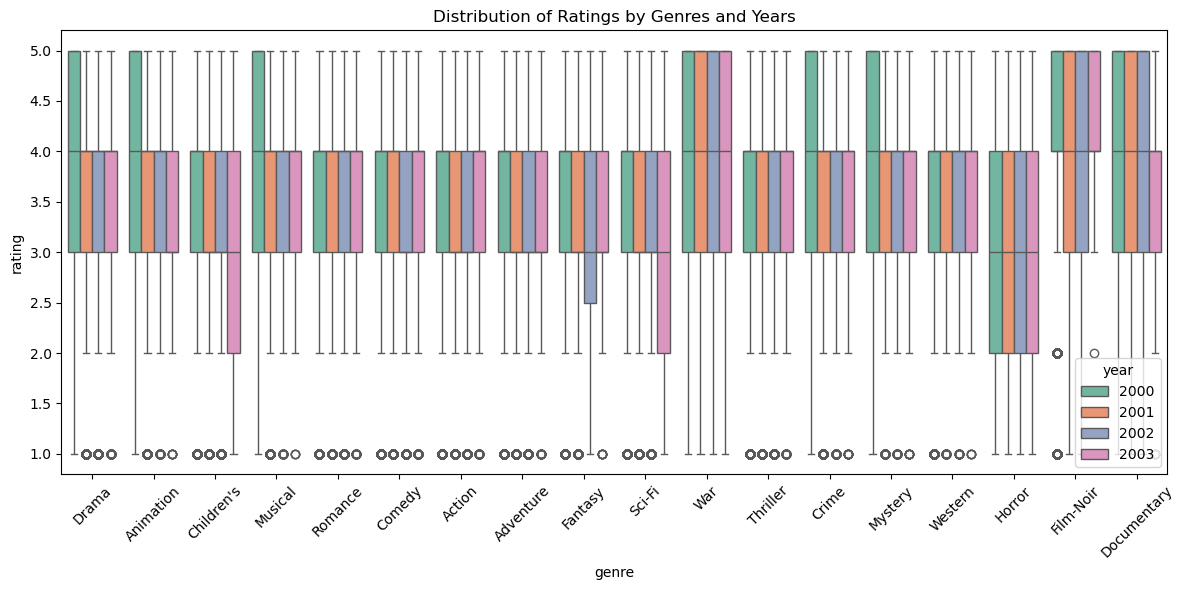

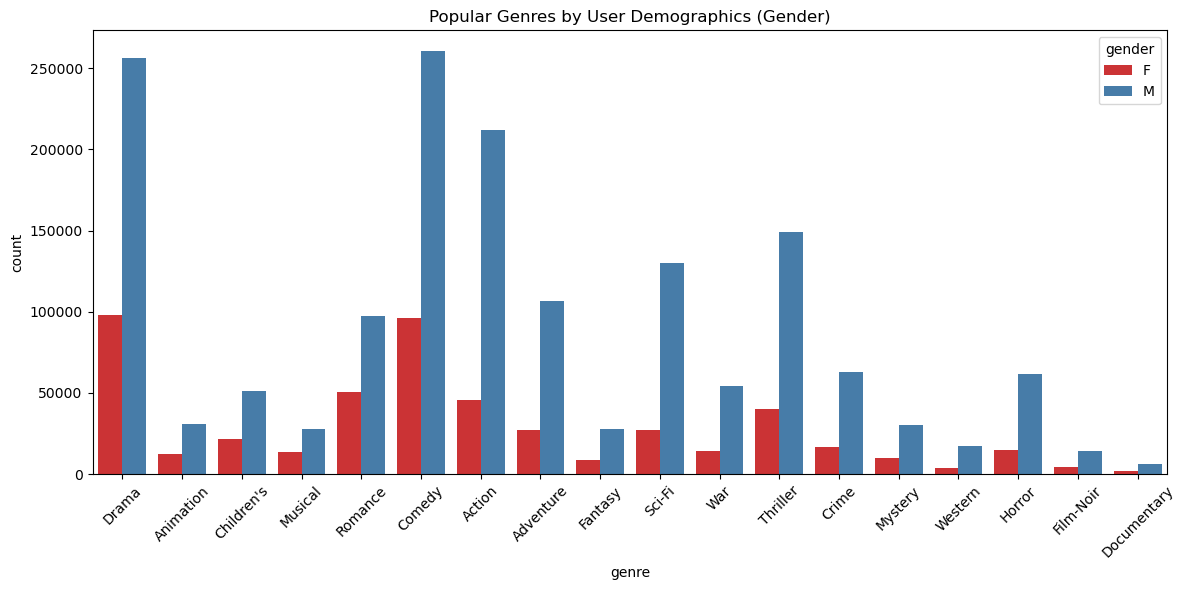

In [16]:
#8. **Visualization Projects**
#`Create dashboards to visualize:`
#`The distribution of ratings by genres and years.`
#`Popular genres by user demographics.`
#`Heatmaps showing the correlation between genres, user activity, and ratings`

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies_path = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat'
movies = pd.read_csv(
    movies_path, delimiter='::', header=None, 
    names=['movie_id', 'title', 'genre'], engine='python', encoding='ISO-8859-1'
)

ratings_path = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat'
ratings = pd.read_csv(
    ratings_path, delimiter='::', header=None, 
    names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python', encoding='ISO-8859-1'
)

users_path = r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\users.dat'
users = pd.read_csv(
    users_path, delimiter='::', header=None, 
    names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python', encoding='ISO-8859-1'
)

merged_data = pd.merge(ratings, movies, on='movie_id')
merged_data = pd.merge(merged_data, users, on='user_id')

merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='s')
merged_data['year'] = merged_data['timestamp'].dt.year

merged_data = merged_data.assign(genre=merged_data['genre'].str.split('|')).explode('genre')

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='genre', y='rating', hue='year', palette='Set2')
plt.title('Distribution of Ratings by Genres and Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='genre', hue='gender', palette='Set1')
plt.title('Popular Genres by User Demographics (Gender)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


